## Analytic maximum likelihood scaled transit fit

We can use a factor $s$ to modifiy the transit depth in a nominal model ${\bf m_0}$ calculated with approximately the correct depth that is scaled as follows ...

$ {\bf m}(s) = 1 + s\times({\bf m_0}- 1)$

The data are normalised fluxes ${\bf f} = f_1, \dots, f_N$ with nominal errors ${\bf \sigma} = \sigma_1,\dots, \sigma_N$. 

Assume that the actual standard errors are underestimated by some factor $b$, and that these are normally distributed and uncorrelated, so that the log-likelihood is

$\ln {\cal L}  = -\frac{1}{2b^2}\chi^2 - \frac{1}{2}\sum_{i=1}^N \ln \sigma_i^2  - N\ln b - \frac{N}{2}\ln(2\pi)$

where

$\chi^2 = \sum_i^N \frac{(f_i - 1 - s(m_{0,i}-1)^2}{\sigma_i^2} $


The maximum likelihood occurs for parameter values $\hat{s}$, and $\hat{b}$ such that

$\left. \frac{\partial  \ln {\cal L}}{\partial s}\right|_{\hat{s},\hat{b}} = 0$
and 
$\left. \frac{\partial  \ln {\cal L}}{\partial b}\right|_{\hat{s},\hat{b}} = 0$,

from which we obtain 

 $\hat{s} = \sum_{i=1}^N \frac{(f_i - 1)(m_{0,i}-1) }{\sigma_i^2} \left[ \sum_{i=1}^N \frac{(m_{0,i}-1)^2}{\sigma_i^2}\right]^{-1}$
 
 and 
 
 $\hat{b} = \sqrt{\chi^2/N}$
 
 For the standard errors on these parameters we use 
 
 $\sigma_s^{-2}  = -\frac{\partial^2\ln{\cal L}}{\partial^2 s^2} \left.\right|_{\hat{s},\hat{b}}$ 
 
 and
 
 $\sigma_b^{-2}  = -\frac{\partial^2\ln{\cal L}}{\partial^2 b^2} \left.\right|_{\hat{s},\hat{b}}$ 

to derive

$\sigma_s = b\left[\sum_{i=1}^N \frac{(m_i-1)^2}{\sigma_i^2}\right]^{-1/2}$
 
 and
 
 $\sigma_b  = \left[3\chi^2/b^4 -N/b^2\right]^{-1/2} .$
 
**N.B.** Whether or how much of the data outside transit to include depends on whether these data can be assumed to have the same noise characteristics as the data in transit. Note that including these data has no effect on $s$ or $\sigma_s$, because of the factors $(m_{0,i}-1)$ in their calculation, but will affect the estimates of $b$ and $\sigma_b$.


In [1]:
%pylab inline
from pycheops.models import TransitModel, scaled_transit_fit
from pycheops.instrument import transit_noise

Populating the interactive namespace from numpy and matplotlib


#### Simulate some data

The reference model ${\bf m_0}$ wil be a transit depth of $D = 250\,$ppm and a transit width $W=3\,$hours.  
Use limb darkening appropriate for a K-type dwarf.


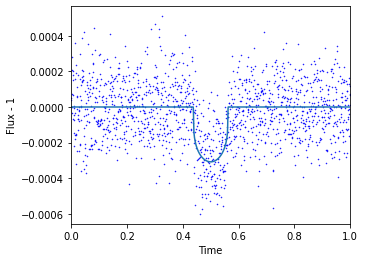

In [2]:
WIDTH_HOURS = 3
DEPTH_PPM = 250
PERIOD = 13
T_0 = 0.5
SIGMA_TRUE_PPM = 150
SIGMA_NOMINAL_PPM = 100

h_1 = 0.680
h_2 = 0.432

time = np.linspace(0,1,1440)

D = DEPTH_PPM*1e-6  # Set transit depth
W = WIDTH_HOURS/24/PERIOD  # Transit Width in phase units
b = 0.33 # Impact parameter 
k = sqrt(D)  # Ratio of the radii

TM = TransitModel()
pars = TM.make_params(T_0=T_0, P=PERIOD, D=D, W=W, b=b, h_1=h_1, h_2=h_2)
model_0 = TM.eval(params=pars, t=time) 

flux = model_0 + np.random.normal(0, SIGMA_TRUE_PPM*1e-6, size=len(time))

fig,ax=subplots(1,1,figsize=(5,4))
ax.plot(time, flux-1,'b.',ms=1)
ax.plot(time, model_0-1)
ax.set_xlim(min(time),max(time))
ax.set_xlabel("Time")
ax.set_ylabel("Flux - 1");

### Fit the transit depth

In [3]:
sigma = SIGMA_NOMINAL_PPM*1e-6
s, b, sigma_s, sigma_b = scaled_transit_fit(flux, sigma ,model_0)
print('Transit scale factor s = {:0.2f} +/- {:0.2f}'.format(s, sigma_s))
print('Error scale factor  b = {:0.2f} +/- {:0.2f}'.format(b, sigma_b))
depth = s*DEPTH_PPM
e_depth = sigma_s*DEPTH_PPM
print('Depth = {:0.0f} +/- {:0.0f} ppm'.format(depth, e_depth))


Transit scale factor s = 0.95 +/- 0.04
Error scale factor  b = 1.54 +/- 0.03
Depth = 237 +/- 11 ppm


&copy; Pierre Maxted, Keele University, 2019